## GLOBAL LEVEL

### 1. [Total_Cases](#Total_Cases)
Part 2: Use case of simple Stacked area chart using Matplotlib.


In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### [Total_Cases](#INDEX)
The total numbers Confirmed, Recovered, and Deaths figures per country. 
We first explore by extracting top 20 most effected Countries by the total number. 

In [2]:
country_profile = pd.read_csv('Country_Summary.csv')

In [3]:
country_profile.head()

,Unnamed: 0,Country Name,Country Code,Total_Pop,Pop_Over_65,Urban_Pop,Life_Expectancy,Pop_Desity,GNI_Per_Capita,Health_Coverage_last,Social_Coverage_last,Hospital_beds_per_1000_last,Physician_per_1000_last,Vulnerable_emp_last,Lat,Long,Confirmed,Deaths,Recovered,Deaths_Rate,Day_Change
0,0,Argentina,ARG,4.449450e+07,4946805.0,40877099.0,76.372000,16.258510,12390.0,30.590558,46.360800,5.0,3.9600,21.502000,-38.416100,-63.616700,22794.000000,664.000000,6909.000000,0.029129,774.000000
1,1,Australia,AUS,2.499237e+07,3912924.0,21496436.0,82.497561,3.249129,53230.0,NaN,NaN,3.8,3.5874,10.729000,-31.996188,141.232788,908.125000,12.750000,838.250000,0.017585,0.750000
2,2,Brazil,BRA,2.094693e+08,18690609.0,181335507.0,75.456000,25.061716,9140.0,30.535312,53.808711,2.2,2.1499,27.524001,-14.235000,-51.925300,691758.000000,36455.000000,283952.000000,0.052699,18912.000000
3,3,China,CHN,1.392730e+09,152098421.0,823827650.0,76.470000,148.348833,9460.0,35.579581,63.053001,4.2,1.7855,43.828001,32.828385,111.649082,2551.242424,140.545455,2407.090909,0.011039,0.151515
4,4,France,FRA,6.698724e+07,13420643.0,53887219.0,82.524390,122.338396,41080.0,NaN,NaN,6.5,3.2349,7.442000,8.305673,5.429018,17372.909091,2650.727273,6451.000000,0.036010,31.181818


In [4]:
top_20 = country_profile.sort_values(by= 'Confirmed',ascending = False).iloc[0:20,:].set_index(keys='Country Name')
others = country_profile.sort_values(by= 'Confirmed',ascending = False).iloc[20::,:].set_index(keys='Country Name')
top_20

,Unnamed: 0,Country Code,Total_Pop,Pop_Over_65,Urban_Pop,Life_Expectancy,Pop_Desity,GNI_Per_Capita,Health_Coverage_last,Social_Coverage_last,Hospital_beds_per_1000_last,Physician_per_1000_last,Vulnerable_emp_last,Lat,Long,Confirmed,Deaths,Recovered,Deaths_Rate,Day_Change
Country Name,,,,,,,,,,,,,,,,,,,,
US,19,USA,3.271674e+08,51717496.0,269114845.0,78.539024,35.766089,63080.0,NaN,NaN,2.9,2.5948,3.734000,37.0902,-95.7129,1942363.0,110514.0,506367.0,0.056897,22302.0
Brazil,2,BRA,2.094693e+08,18690609.0,181335507.0,75.456000,25.061716,9140.0,30.535312,53.808711,2.2,2.1499,27.524001,-14.2350,-51.9253,691758.0,36455.0,283952.0,0.052699,18912.0
Russia,13,RUS,1.444780e+08,21201732.0,107539347.0,72.119024,8.822080,10230.0,56.341200,77.875141,8.2,4.0139,5.247000,60.0000,90.0000,467073.0,5851.0,226272.0,0.012527,8971.0
India,6,IND,1.352617e+09,83591151.0,460295677.0,69.165000,454.938073,2020.0,17.663517,93.988803,0.7,0.7776,76.695003,21.0000,78.0000,257486.0,7207.0,123848.0,0.027990,10864.0
Spain,15,ESP,4.672375e+07,9054365.0,37528982.0,83.329268,93.529058,29340.0,NaN,NaN,3.0,4.0691,11.362000,40.0000,-4.0000,241550.0,27136.0,150376.0,0.112341,240.0
Italy,8,ITA,6.043128e+07,13749132.0,42566587.0,83.243902,205.450748,33730.0,NaN,NaN,3.4,4.0931,17.000000,43.0000,12.0000,234998.0,33899.0,165837.0,0.144252,197.0
Peru,137,PER,3.198926e+07,2587417.0,24921870.0,76.286000,24.991606,6470.0,11.515865,64.854444,1.6,1.2700,50.954999,-9.1900,-75.0152,196515.0,5465.0,86219.0,0.027809,4757.0
Germany,5,DEU,8.292792e+07,17797959.0,64113235.0,80.990244,237.370970,47090.0,NaN,NaN,8.3,4.2087,5.825000,51.0000,9.0000,185750.0,8685.0,169224.0,0.046756,300.0
Iran,90,IRN,8.180027e+07,5058998.0,61266765.0,76.271000,50.222420,5470.0,NaN,NaN,1.5,1.1400,41.242000,32.0000,53.0000,171789.0,8281.0,134349.0,0.048204,2364.0


In [5]:
df = pd.DataFrame(top_20.loc[:,['Confirmed', 'Deaths', 'Recovered']].T)
top_20_countries = np.array(df.columns)
top_20_confirmed = df.loc['Confirmed',:]
top_20_deaths = df.loc['Deaths',:]
top_20_recovered = df.loc['Recovered',:]

In [6]:
top_20_countries = np.array(top_20.index)      

In [7]:
df = pd.DataFrame(top_20.loc[:,['Confirmed', 'Deaths', 'Recovered']].T)
top_20_countries = np.array(df.columns)
top_20_confirmed = df.loc['Confirmed',:]
top_20_deaths = df.loc['Deaths',:]
top_20_recovered = df.loc['Recovered',:]

In [9]:
confirmed_time_series = pd.read_csv('confirmed_time_series.csv').drop(['Unnamed: 0'], axis=1)
confirmed_time_series = confirmed_time_series.drop([ 'Lat', 'Long'], axis = 1)
confirmed_time_series = confirmed_time_series.groupby('Country/Region').sum().T

In [10]:
deaths_time_series = pd.read_csv('deaths_time_series.csv').drop(['Unnamed: 0'], axis=1)
deaths_time_series = deaths_time_series.drop([ 'Lat', 'Long'], axis = 1)
deaths_time_series = deaths_time_series.groupby('Country/Region').sum().T

In [11]:
recovered_time_series = pd.read_csv('recovered_time_series.csv').drop(['Unnamed: 0'], axis=1)
recovered_time_series = recovered_time_series.drop([ 'Lat', 'Long'], axis = 1)
recovered_time_series = recovered_time_series.groupby('Country/Region').sum().T

In [12]:
countries = np.array(confirmed_time_series.columns)
countries = pd.Series(countries).replace({'United States' :'US', 
                              'Iran, Islamic Rep.': 'Iran', 
                              'Russian Federation':'Russia', 
                              'Korea, Rep.' : 'Korea, South'})

In [13]:
top_20_time_series = confirmed_time_series.loc[:,top_20_countries]
top_20_time_series_deaths = deaths_time_series.loc[:,top_20_countries]
top_20_time_series_recovered = recovered_time_series.loc[:,top_20_countries]

In [14]:
df1 = top_20_time_series
df2 = top_20_time_series_deaths
df3 = top_20_time_series_recovered

## Stacked Area Chart 
The simple Matplotlib function can display area chart below in two lines, given a properly structured data. 

Text(0.5, 1.0, 'Global total')

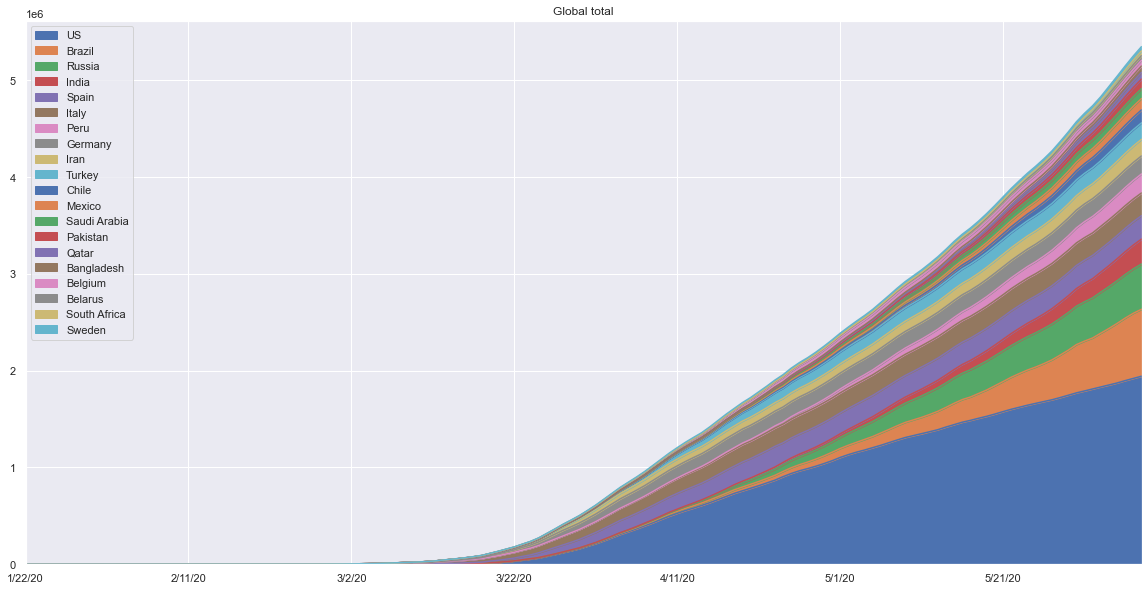

In [16]:
top_20_time_series.plot.area(figsize= (20,10))
plt.legend()
plt.title('Global total')